<a href="https://colab.research.google.com/github/reinaqu/reportingslroo/blob/main/When_business_processes_meets_complex_events_in_logistics_A_mapping_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# When business processes meets complex events in logistics: A mapping study

This notebook contains all the synthesis operations implemented in Python that allows us to generate tables and graphics that are used in the report of the mapping study 


## Environment configuration

Clone the github repository with all the scripts and install the dependencies.


In [1]:
#from getpass import getpass
import os

#os.environ['USER'] = input('Enter the username of your Github account: ')
#os.environ['PASSWORD'] = getpass('Enter the password of your Github account: ')
#os.environ['REPOSITORY'] = input('Enter the name of the Github repository: ')
#os.environ['GITHUB_AUTH'] = os.environ['USER'] + ':' + os.environ['PASSWORD']
#!rm -rf $REPOSITORY # To remove the previous clone of the Github repository
#!git clone https://$GITHUB_AUTH@github.com/$USER/$REPOSITORY.git
#os.environ['USER'] = os.environ['PASSWORD'] = os.environ['REPOSITORY'] = os.environ['GITHUB_AUTH'] = ""
#from google.colab import drive
#drive.mount('/content/drive/')
#%cd /content/drive/

os.environ['REPOSITORY'] ='reportingslroo'
os.environ['USER'] = 'reinaqu'
!dir $REPOSITORY
!rm -rf $REPOSITORY # To remove the previous clone of the Github repository
#! git clone https://github.com/reinaqu/reportingslr.git
!git clone https://github.com/$USER/$REPOSITORY.git
#!pip uninstall -y pandas
#!pip uninstall -y matplotlib
!pip install --upgrade geopandas
!pip install pandas==1.1.1
!pip install matplotlib==3.3.1
!pip install bibtexparser
!pip install plotnine
import sys
sys.path.append('reportingslroo')
sys.path.append('reportingslroo/src/')
sys.path.append('reportingslroo/data/')

data
old-data
out
README.md
src
When_business_processes_meets_complex_events_in_logistics_A_mapping_study.ipynb
Cloning into 'reportingslroo'...
remote: Enumerating objects: 580, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 580 (delta 115), reused 173 (delta 105), pack-reused 397
Receiving objects: 100% (580/580), 23.82 MiB | 17.55 MiB/s, done.
Resolving deltas: 100% (357/357), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import configurations
import Publications as pub
import PublicationsQuality as pubq
import Dashboard as dashbd
import DashboardLatex as dashbdlat
import Authors as auth
import Venues as ven
import DataExtraction as datext
import DashboardDataExtraction as datextdash
import pandas as pd
import test_utils

FULL_REPORT_FILE="reportingslroo/data/report.v.0.2.93-all.xls"
REPORT_FILE="reportingslroo/data/report.v.0.2.93.xls"
AUTHORS_INPUT_FILE ="reportingslroo/data/all-authors-3.0.xlsx"
VENUES_INPUT_FILE ="reportingslroo/data/all-venues-3.0.xlsx"
CITATION_INPUT_FILE="reportingslroo/data/citations_per_paper-3.0.xlsx"
MAP_FILE='reportingslroo/data/countries.geojson'
pd.__version__

'1.1.1'

## Data synthesis and results

First, we have to create all the objects needed for doing synthesis.

In [3]:
#Objects creation for invoking the different operations
#Create a pair of objects for managing the whole set of recovered studies
publ_full = pub.Publications.of_excel(FULL_REPORT_FILE,configurations.config_publ)
db_full = dashbd.Dashboard.of(publ_full)

#Create a pair of objects for managing the set of selected publications
publ = pub.Publications.of_excel(REPORT_FILE,configurations.config_publ)
db = dashbd.Dashboard.of(publ)
#Create a dashboard object specific for latex generation
dblat = dashbdlat.DashboardLatex.of(publ)
#Create object for venues
venues= ven.Venues.of_excel(VENUES_INPUT_FILE, configurations.config_venues)
dblat.set_venues(venues) #add the venues to the Latex dashboard

#Create a pair of objects for managing the extracted data
data_df = datext.DataExtraction.of_excel(REPORT_FILE,configurations.config_data_extraction)
datadash = datextdash.DashboardDataExtraction.of(data_df)


### Studies Quality
We evaluate the quality of selected study by applying a data information quality framework. Studies quality is measured according to two dimensions: Intrisic and Contextual Information Quality.

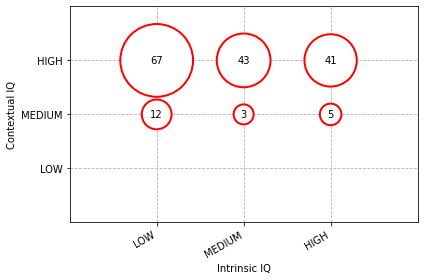

  Intrinsic IQ Contextual IQ  number of studies
0         HIGH          HIGH                 41
1         HIGH        MEDIUM                  5
2          LOW          HIGH                 67
3          LOW        MEDIUM                 12
4       MEDIUM          HIGH                 43
5       MEDIUM        MEDIUM                  3


In [4]:
pub_quality = pubq.PublicationsQuality.of_excel(REPORT_FILE, configurations.config_publ)  
datadash.set_publications_quality(pub_quality)
datadash.create_bubble_quality()
print(datadash.get_publications_quality.count_pairs_per_quality_measure)

### Studies per datasource
Counts the number of primary studies recovered from the different data sources. 




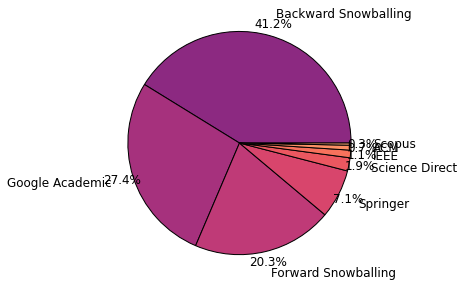

datasource
Backward Snowballing    4524
Google Academic         3004
Forward Snowballing     2230
Springer                 778
Science Direct           210
IEEE                     120
ACM                       78
Scopus                    34
Name: number of studies, dtype: int64


In [5]:
db_full.create_piechart_studies_by_datasource
print(publ_full.count_studies_per_datasource)


### Selected publication per type
Counts the number of selected primary studies per type of publication (conference, journal, worksnop,...)

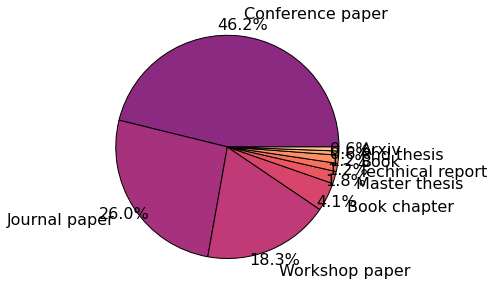

type
Conference paper    78
Journal paper       44
Workshop paper      31
Book chapter         7
Master thesis        3
Technical report     2
Book                 2
Phd thesis           1
Arxiv                1
Name: number of studies, dtype: int64


In [6]:
  db.create_piechart_studies_by_type
  print(publ.count_studies_by_type)
  

### RQ1. What are the demographics of the published studies?
This research question help to identify the quantity and frequency of publications, the top researchers in the area, the top countries, the most influential studies and the top venues.

#### RQ1.1. Which contributions were made over the years?
To answer this research question we need to count the number of selected studies by year.

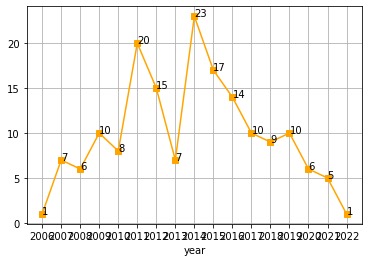

year
2006     1
2007     7
2008     6
2009    10
2010     8
2011    20
2012    15
2013     7
2014    23
2015    17
2016    14
2017    10
2018     9
2019    10
2020     6
2021     5
2022     1
Name: number of studies, dtype: int64


In [7]:
db.create_plot_studies_by_year
print(publ.count_studies_by_year)


#### RQ1.2. Which  are  the  top  researchers  in  the  area and where are they from?
To answer this question we have to count the number of studies per author, and the number of studies per country. Note that one studies can have various authors and each author belongs to an institution placed in one country. As a consequence, the countries of origin of one primary study have been determined by the country of the institutions of the authors of the papers.

        Author name  number of studies
0     Mathias Weske                 13
1    Anne Baumgrass                 10
2      Jan Mendling                  8
3     Andreas Meyer                  6
4    Claudio Ciccio                  6
..              ...                ...
378      Yunjia Liu                  1
379    Yunjing Yuan                  1
380  Zhangbing Zhou                  1
381  Zineb Lamghari                  1
382    Zsolt Kemény                  1

[383 rows x 2 columns]


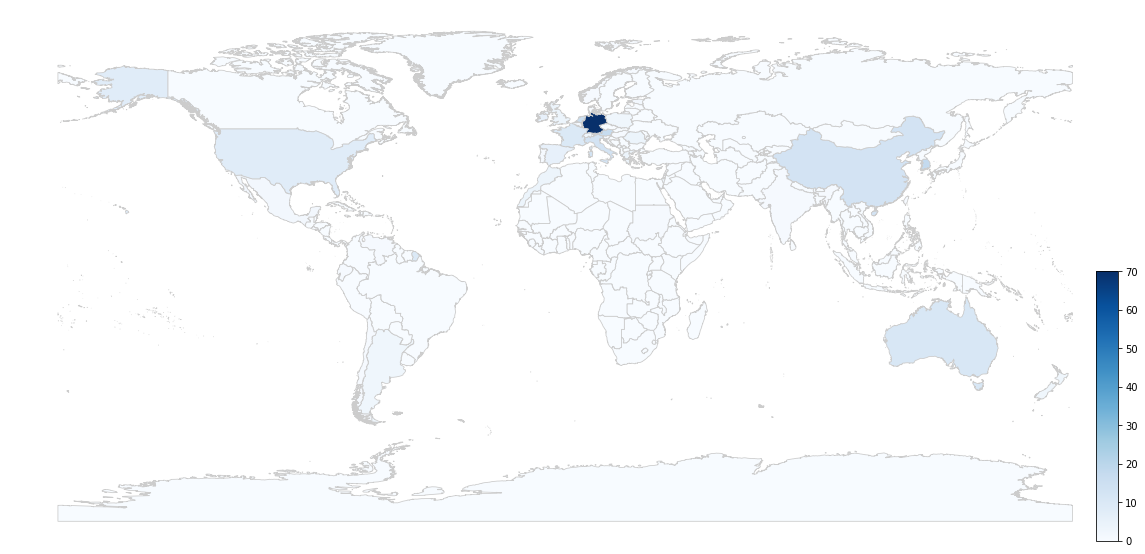

In [8]:
#Create object to store information about authors
authors = auth.Authors.of_excel(AUTHORS_INPUT_FILE, configurations.config_auth)
#Count the number of selected studies per authors
authors_count_df = authors.count_number_of_studies_per_author
print(authors_count_df)

#Count the number of studies per country
countries_count_df = authors.count_number_of_studies_per_country
db.set_authors(authors) # Store the information about authors in the dashboard
db.set_geojson_file(MAP_FILE)
db.create_map_countries  # Create a map with the information about the countries


#### RQ1.3.  Which are the most influential studies in the area?
To answer this question we have to order the studies by the number of citations. We have obtained the number of citations from Google Scholar and from Scopus. As a consenquence, the list of resulting studies is ordered by the number of citations in Google Scholar, and then by the number of citations in Scopus.

In [9]:
 publ.set_citations_dataframe_from_excel(CITATION_INPUT_FILE, ['GoogleScholar','Scopus'])
 print(publ.citation_df)
 dblat.generate_citations(['GoogleScholar','Scopus'])


     ID Paper                                              Title  \
0      374576  Event correlation for process discovery from w...   
1        2673  Monitoring business constraints with the event...   
2      265374  Event-driven rules for sensing and responding ...   
3        3071  IoT-enabled real-time production performance a...   
4      237136  Beyond process monitoring: a proof-of-concept ...   
..        ...                                                ...   
164      2124  On Enabling Context-aware Compliance Monitorin...   
165      2053  PACT-ART: Adaptive and context-aware processes...   
166      2721  Process mining driven analysis-Model discovery...   
167     14145  The design and implementation of situation awa...   
168      2195  Towards a Development of Automated-Adaptable B...   

     Citations-GoogleScholar  Citations-Scopus  
0                        183               109  
1                        135                93  
2                        109        

#### RQ1.4. Which are the top venues?
To answer this question we have to count the number of selected studies per venue. As workshops that are hold with conferences may vary in different conference editions, they are grouped as a unique venue. For example, workshops hold with BPM conference are grouped as BPM Workshops.

In [10]:
venues_count_df = venues.count_number_of_studies_per_venue
pd.set_option("display.max_rows", 10, "display.max_columns", None)
print(venues_count_df)

                                     Venue        Type  number of studies
0    Business Process Management Workshops    Workshop                 10
1                                      BPM  Conference                  6
2                  Bus. Process. Manag. J.     Journal                  4
3                               Inf. Syst.     Journal                  4
4                           EDOC Workshops    Workshop                  3
..                                     ...         ...                ...
108                              VIPSI-VIP  Conference                  1
109                                   WCCS  Conference                  1
110                                   WISA  Conference                  1
111                                  WiCOM  Conference                  1
112      iThings/GreenCom/CPSCom/SmartData  Conference                  1

[113 rows x 3 columns]


In [11]:
#Generate venues to be included in a latex table
dblat.generate_venues() 

1 & \textsf{ Business Process Management Workshops } & Workshop & 10 \\ 
2 & \textsf{ BPM } & Conference & 6 \\ 
3 & \textsf{ Bus. Process. Manag. J. } & Journal & 4 \\ 
4 & \textsf{ Inf. Syst. } & Journal & 4 \\ 
5 & \textsf{ EDOC Workshops } & Workshop & 3 \\ 
6 & \textsf{ Comput. Ind. } & Journal & 3 \\ 
7 & \textsf{ Comput. Ind. Eng. } & Journal & 3 \\ 
8 & \textsf{ BIS } & Conference & 3 \\ 
9 & \textsf{ ICSOC } & Conference & 3 \\ 
10 & \textsf{ CAiSE Workshops } & Workshop & 2 \\ 
11 & \textsf{ EMISA } & Workshop & 2 \\ 
12 & \textsf{ Ph.D. Retreat of the HPI Research School on Service-oriented Systems Engineering } & Workshop & 2 \\ 
13 & \textsf{ Expert Syst. Appl. } & Journal & 2 \\ 
14 & \textsf{ IEEE Trans Autom. Sci. Eng. } & Journal & 2 \\ 
15 & \textsf{ CAiSE } & Conference & 2 \\ 
16 & \textsf{ DEBS } & Conference & 2 \\ 
17 & \textsf{ EDOC } & Conference & 2 \\ 
18 & \textsf{ IEOM } & Conference & 2 \\ 
19 & \textsf{ LDIC } & Conference & 2 \\ 
20 & \textsf{ OTM Confer

### RQ2. What are the current trends in the area?
This research question helps to identify the nature of the existing work in the area. We have broken this question down into different secondary questions.

#### RQ2.1. What is the type of contribution made by the study?
To answer this question we have to count the number of studies per type of contribution (framework, method, language, model, ...). It deserves to be notice that one study can provide more than one type of contribution. We have depicted the number of studies per type of contribution in a barchart, and also the number of studies per type of contribution and year in a bubble chart.

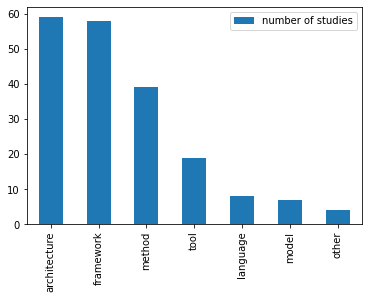

ContributionType
architecture    59
framework       58
method          39
tool            19
language         8
model            7
other            4
Name: number of studies, dtype: int64


In [12]:
datadash.create_bar_count_multivalued_column("ContributionType")
print(datadash.get_data.count_multivalued_column("ContributionType"))     


List of studies per type of contribution.

In [13]:
test_utils.show_dict_from_multivalued_column(datadash, "ContributionType")

tool --> [133, 1967, 1990, 1992, 2344, 2566, 2569, 2728, 2996, 14098, 296369, 374576, 507986, 1932748, 2353203, 2614324, 2644233, 2644431, 3343996]
other --> [97, 101, 110, 2265]
model --> [10, 124, 166, 2019, 2195, 2353028, 3343998]
method --> [0, 18, 98, 102, 103, 106, 112, 113, 150, 271, 1934, 1967, 1971, 2021, 2039, 2105, 2252, 2557, 2565, 2586, 2709, 2721, 2728, 2731, 2751, 2907, 2964, 14098, 296393, 296444, 296464, 374576, 507986, 1932839, 2352955, 2353028, 2353249, 2614833, 2644180]
language --> [10, 166, 205, 1941, 2019, 2392, 2811, 265374]
framework --> [4, 104, 107, 108, 109, 118, 128, 129, 139, 178, 189, 245, 248, 1906, 1909, 1926, 1942, 1967, 1969, 1978, 2001, 2003, 2009, 2023, 2035, 2040, 2054, 2094, 2095, 2106, 2108, 2124, 2130, 2227, 2351, 2574, 2605, 2673, 2694, 2720, 2849, 2921, 2923, 13649, 13682, 13717, 14136, 14356, 265471, 296369, 471320, 1932566, 2117185, 2117201, 2353212, 2614539, 2614909, 2644581]
architecture --> [4, 6, 98, 100, 110, 128, 133, 1894, 1901, 1909,

Studies per type of contribution and year.

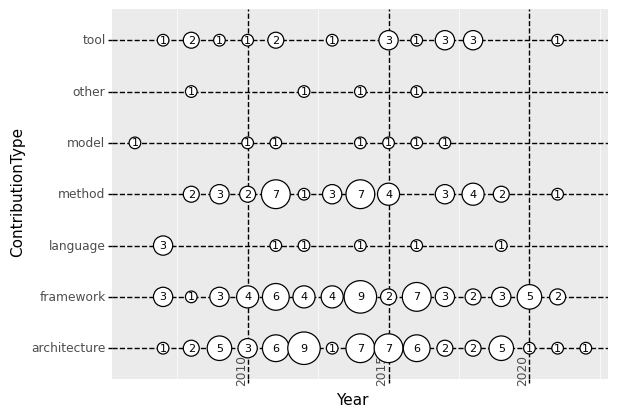

In [14]:
incl_list= ['architecture', 'framework', 'method','tool', 'language','model','other']
datadash.create_bubble_multivalued_single("ContributionType", 'year', incl_list)

Properties of the studies that propose architectures, frameworks and/or tools.

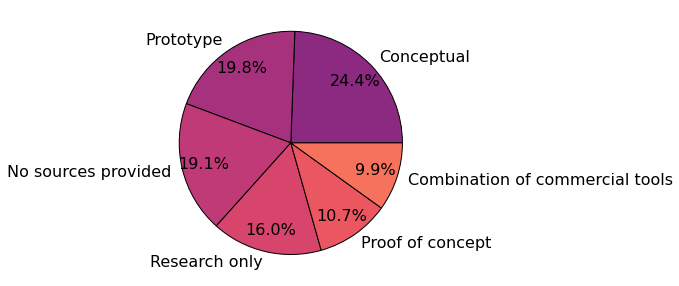

State-framework-tool-architecture
n/a                                34
Conceptual                         32
Prototype                          26
No sources provided                25
Research only                      21
Proof of concept                   14
Combination of commercial tools    13
undetermined                        4
Name: number of studies, dtype: int64


In [15]:
datadash.create_piechart_count_multivalued_column("State-framework-tool-architecture", \
                                                      exclude=['undetermined', 'n/a'])

print(datadash.get_data.count_multivalued_column("State-framework-tool-architecture"))   

#### RQ2.2. Which are the application areas of the approaches?

To answer this question we have to count the number of applications area per study. It deserves to be noticed that one study could be related to more than one domain.

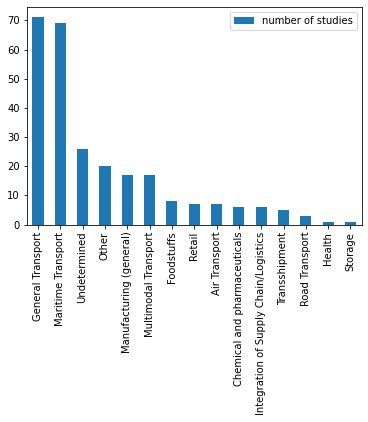

     ID Paper                        Logistic Sector
0           0                      General Transport
1           0                             Foodstuffs
2           4                     Maritime Transport
3           4                      General Transport
4           6                          Air Transport
..        ...                                    ...
259   2644581  Integration of Supply Chain/Logistics
260   3247016                           Undetermined
261   3343996                           Undetermined
262   3343998                                 Health
263   3343998  Integration of Supply Chain/Logistics

[264 rows x 2 columns]


In [16]:
datadash.create_bar_count_multivalued_column("Logistic Sector",exclude=['undetermined'])
domain_df=data_df.get_multivalued_column("Logistic Sector")
print(domain_df)


List of studies per area of application

In [17]:
test_utils.show_dict_from_multivalued_column(datadash, "Domain")

undetermined --> [97, 102, 178, 189, 245, 248, 1936, 2003, 2021, 2039, 2095, 2105, 2557, 2569, 2709, 2866, 2904, 296369, 471320, 507542, 558969, 1932748, 1932839, 2117201, 2353203, 2353249, 2614321, 2614324, 2644405, 3247016, 3343996]
transport --> [4, 98, 100, 106, 107, 108, 112, 113, 124, 129, 133, 139, 150, 205, 271, 1894, 1913, 1934, 1941, 1969, 1971, 1992, 2001, 2014, 2023, 2028, 2035, 2040, 2051, 2054, 2076, 2094, 2096, 2106, 2124, 2127, 2130, 2131, 2142, 2195, 2227, 2252, 2265, 2276, 2277, 2344, 2351, 2392, 2565, 2566, 2596, 2721, 2751, 2816, 2907, 2921, 2932, 2996, 14136, 14145, 14356, 14777, 237068, 2353028, 2353212, 2614539, 2614833, 2644180, 2644233, 2644431]
retail --> [103, 1909, 1930, 14777, 507986, 2353211, 2614833, 2614909]
port --> [4, 6, 98, 100, 106, 107, 108, 112, 113, 124, 128, 129, 133, 139, 150, 205, 271, 1894, 1913, 1934, 1941, 1969, 1971, 1978, 1992, 2001, 2014, 2023, 2028, 2035, 2040, 2051, 2054, 2076, 2094, 2096, 2106, 2124, 2127, 2130, 2131, 2142, 2195, 2227

#### RQ2.3. How is logistics covered in the studies?
To answer this question we have to count the number of studies per logistic coverage.

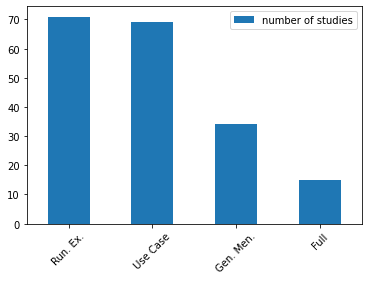

Logistics coverage
motivating/running example      71
use case                        69
general mention in the paper    34
full                            15
Name: number of studies, dtype: int64


In [18]:
dict_log_cov_translation={'use case':'Use Case',\
                              'motivating/running example':'Run. Ex.',\
                              'general mention in the paper':'Gen. Men.',\
                              'full':'Full',\
                              'undetermined':'Undet.'\
                      }
datadash.create_bar_count_multivalued_column("Logistics coverage", rotation=45,translation=dict_log_cov_translation)
logistic_coverage_df=data_df.get_multivalued_column("Logistics coverage")
print(data_df.count_multivalued_column("Logistics coverage"))

List of studies per logistic coverage

In [19]:
test_utils.show_dict_from_multivalued_column(datadash, "Logistics coverage")

use case --> [10, 101, 106, 107, 110, 112, 113, 124, 129, 133, 150, 271, 1894, 1901, 1906, 1909, 1913, 1918, 1934, 1941, 1971, 2007, 2014, 2019, 2021, 2040, 2053, 2054, 2058, 2076, 2094, 2096, 2108, 2127, 2131, 2142, 2195, 2227, 2252, 2265, 2344, 2351, 2565, 2566, 2586, 2673, 2694, 2720, 2721, 2728, 2765, 2816, 2907, 2921, 2923, 2932, 2985, 2996, 3071, 14098, 14356, 237136, 296444, 296464, 507613, 507928, 2353212, 2614539, 2614833]
motivating/running example --> [0, 4, 18, 98, 100, 102, 103, 104, 108, 109, 118, 133, 139, 178, 205, 248, 1913, 1918, 1926, 1930, 1967, 1969, 1978, 1990, 1992, 2001, 2007, 2009, 2017, 2023, 2028, 2035, 2039, 2040, 2053, 2076, 2094, 2106, 2124, 2127, 2130, 2227, 2252, 2276, 2344, 2392, 2566, 2596, 2605, 2673, 2720, 2731, 2751, 13682, 13717, 14136, 14145, 14356, 265248, 265374, 265471, 296393, 296444, 374576, 507613, 507986, 2353028, 2353249, 2614909, 2644581, 3343998]
general mention in the paper --> [6, 97, 128, 166, 189, 1936, 1942, 1990, 2003, 2095, 2277, 

#### RQ2.4. What type and which business process modelling languages are utilised?
The rationale behind this question is to classify and identify the business process modelling languages utilised in the different studies. Each language has been classified according to its imperative or declarative nature. Note that one study can be classified as imperative and declarative if presents languages in of both styles.

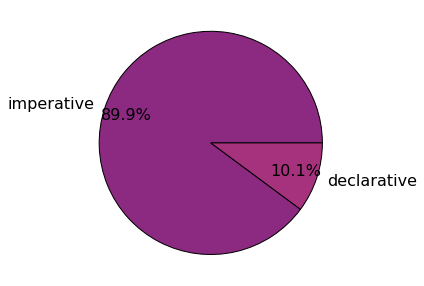

Modelling language type
imperative      124
undetermined     32
declarative      14
Name: number of studies, dtype: int64


In [20]:
datadash.create_piechart_count_multivalued_column("Modelling language type", exclude=['undetermined'])
print(datadash.get_data.count_multivalued_column("Modelling language type"))


Regarding business process modelling languages, we have extracted the different languages from studies.

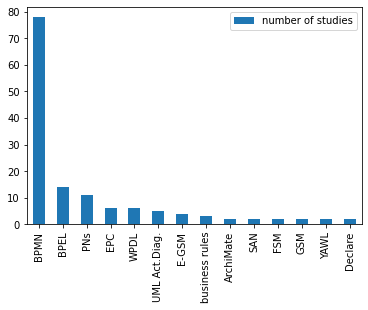

Modelling language
BPMN                                             78
undetermined                                     37
BPEL                                             14
Petri Nets                                       11
EPC (Event Driven Process Chain)                  6
                                                 ..
ebBP                                              1
Bayesian Network                                  1
vBPMN                                             1
HTCPN (Hierarchical Timed Colored Petri Nets)     1
EPEL (EPC Execution Language)                     1
Name: number of studies, Length: 32, dtype: int64


In [21]:
dict_ml={"Petri Nets":"PNs",\
             "SAN (Situation-Action-Network)":"SAN",\
             "FSM (Finite State Machine)":"FSM",\
             "WPDL (Workflow Process Definition Language)":"WPDL",\
             "EPC (Event Driven Process Chain)":"EPC",\
             "GSM (Guard-Stage-Milestone)":"GSM",\
             "UML Activity Diagram":"UML Act.Diag."
             }
datadash.create_bar_count_single_column_with_multiple_values("Modelling language", translation=dict_ml, exclude=['undetermined'], count_inferior_limit=1)    
print(datadash.get_data.count_single_column_with_multiple_values("Modelling language"))


#### RQ2.5. What type and which event processing languages are utilised?
The rationale behind this question is to classify and identify the event processing languages utilised in the different studies. Each language has been classified according to the five language styles for CEP: languages based on composition operators, data stream query languages, production rules, timed state machines, logic languages and hybrid approaches.

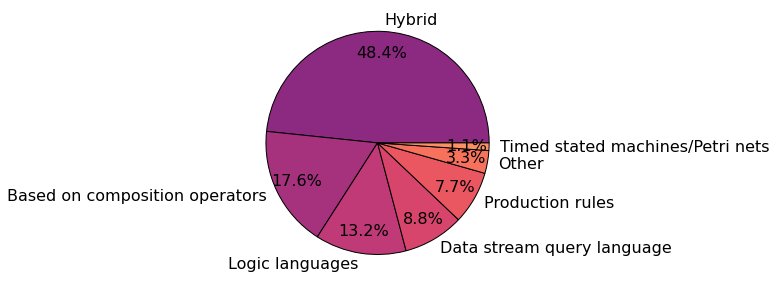

Event Processing Language Style
N/A                                 78
Hybrid                              44
Based on composition operators      16
Logic languages                     12
Data stream query language           8
Production rules                     7
Other                                3
Timed stated machines/Petri nets     1
Name: number of studies, dtype: int64


In [22]:
datadash.create_piechart_count_multivalued_column("Event Processing Language Style", exclude=['undetermined', 'N/A'])
print(datadash.get_data.count_single_column_with_multiple_values("Event Processing Language Style"))


Regarding the event processing languages (EPLs), we have extracted the different EPLs from studies.

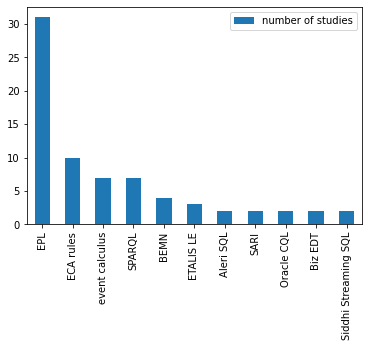

Event processing Language
undetermined                                77
EPL (Esper Event Processing Language)       31
ECA rules                                   10
event calculus                               7
SPARQL                                       7
                                            ..
Apache FlinkCEP                              1
Lucene Query Language                        1
LiSEP EPL                                    1
SCEP (Semantic Complex Event Processing)     1
CEPAT                                        1
Name: number of studies, Length: 34, dtype: int64


In [23]:
dict_epl={"Petri Nets":"PNs",\
             "EPL (Esper Event Processing Language)":"EPL",\
             "BEMN (Business Event Modeling Notation)":"BEMN",\
             "Biz AL (Business Aware Language)":"Biz AL",\
             "EPN (Event Processing Network)":"EPN",\
             "ETALIS Language for Events":"ETALIS LE"
             }
    
datadash.create_bar_count_single_column_with_multiple_values("Event processing Language", translation=dict_epl, exclude=['undetermined'], count_inferior_limit=1)
print(datadash.get_data.count_single_column_with_multiple_values("Event processing Language"))

Combination of business process modelling language and event processig language

In [24]:
  datadash.create_sankey_from_multivalued_columns("Modelling language", "Event processing Language", exclude=["undetermined"], replace_commas=True)

#### RQ2.6. Which are the event producers?

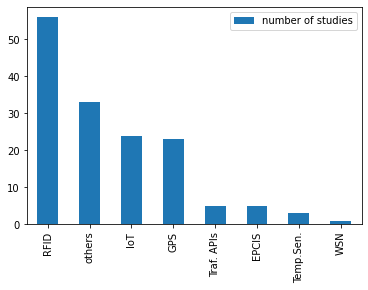

Technology of event producer
undetermined                      60
RFID                              56
others                            33
IoT                               24
GPS                               23
public APIs for traffic            5
EPCIS standard                     5
temperature sensors                3
wireless sensor networks (WSN)     1
Name: number of studies, dtype: int64


In [25]:
dict_evpr={"wireless sensor networks (WSN)":"WSN",\
           "public APIs for traffic":"Traf. APIs", \
           "EPCIS standard":"EPCIS",\
           "temperature sensors":"Temp.Sen."}

datadash.create_bar_count_multivalued_column("Technology of event producer",  translation=dict_evpr, exclude=['undetermined'])

print(datadash.get_data.count_multivalued_column("Technology of event producer"))

     

Studies per event producers

In [26]:
test_utils.show_dict_from_multivalued_column(datadash, "Technology of event producer")

wireless sensor networks (WSN) --> [2644431]
undetermined --> [0, 6, 97, 100, 103, 104, 113, 150, 166, 178, 189, 205, 248, 271, 1934, 1941, 1969, 1978, 1990, 1992, 2028, 2035, 2051, 2052, 2096, 2124, 2130, 2131, 2276, 2277, 2351, 2392, 2720, 2721, 2728, 2731, 2751, 2811, 2849, 2907, 2923, 2932, 2985, 2996, 13649, 14145, 237068, 265374, 296369, 296464, 374576, 507542, 507928, 507986, 2353211, 2353249, 2644405, 2644581, 3343996, 3343998]
temperature sensors --> [4, 2021, 2614324]
public APIs for traffic --> [101, 1909, 2040, 2142, 14356]
others --> [106, 108, 133, 1909, 1913, 1926, 1936, 1967, 1971, 2017, 2023, 2040, 2053, 2054, 2058, 2076, 2106, 2227, 2252, 2344, 2596, 2673, 2765, 2921, 13682, 13717, 14098, 237136, 265248, 296393, 507613, 558969, 2614321]
RFID --> [10, 101, 102, 109, 118, 128, 129, 245, 1894, 1901, 1906, 1909, 1918, 1930, 1942, 2001, 2003, 2007, 2009, 2014, 2019, 2021, 2039, 2054, 2058, 2094, 2105, 2106, 2108, 2142, 2195, 2265, 2557, 2565, 2569, 2574, 2586, 2605, 2709, 

### RQ3. What are the potential gaps in the area?
This research question helps to identify potential gaps in the area. As we have broken this question down into different secondary questions.

#### RQ3.1.Is event-driven business process treated in every phase of the process life cycle in a logistic context?
To answer this question we have to count the number of studies per process life cycle phase.

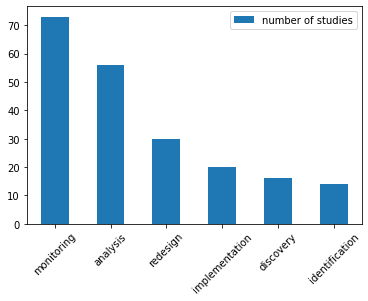

Process lifecycle phase
process monitoring        73
process analysis          56
process redesign          30
process implementation    20
process discovery         16
process identification    14
Name: number of studies, dtype: int64


In [27]:
dict_plc_translation={'process monitoring':'monitoring',\
                       'process identification': 'identification',\
                       'process analysis' : 'analysis',\
                       'process redesign':'redesign',\
                       'process discovery':'discovery',\
                       'process implementation':'implementation',\
                       'undetermined':'undetermined'
                       }      
datadash.create_bar_count_multivalued_column("Process lifecycle phase", rotation=45, translation = dict_plc_translation)

print(datadash.get_data.count_multivalued_column("Process lifecycle phase"))

Studies per process life cycle phase

In [28]:
test_utils.show_dict_from_multivalued_column(datadash, "Process lifecycle phase")

process redesign --> [128, 139, 150, 189, 205, 245, 1913, 1936, 1967, 2001, 2007, 2017, 2019, 2023, 2195, 2276, 2392, 2586, 2731, 2907, 2964, 265471, 296393, 1932839, 2117201, 2353203, 2353249, 2614321, 2614324, 2644405]
process monitoring --> [4, 6, 10, 97, 98, 100, 101, 102, 103, 104, 108, 109, 110, 112, 113, 129, 133, 189, 248, 1894, 1901, 1909, 1918, 1942, 1967, 1969, 1978, 2009, 2014, 2035, 2058, 2076, 2094, 2095, 2096, 2106, 2108, 2127, 2130, 2131, 2142, 2227, 2276, 2277, 2351, 2596, 2673, 2866, 2921, 2923, 2985, 2996, 13621, 14136, 14356, 237068, 237136, 265248, 296393, 507613, 507928, 558969, 1932748, 2352955, 2353211, 2353212, 2614539, 2644233, 2644431, 2644581, 3247016, 3343996, 3343998]
process implementation --> [107, 118, 124, 166, 1906, 1930, 1967, 2021, 2052, 2054, 2265, 2344, 2557, 2569, 2765, 2904, 13682, 1932566, 2117185, 2353028]
process identification --> [18, 1906, 1926, 1930, 1967, 1978, 2252, 2811, 13649, 13682, 14136, 14145, 265374, 471320]
process discovery -->

Furthermore, we have classified the studies per process lyfe cycle phase and year.

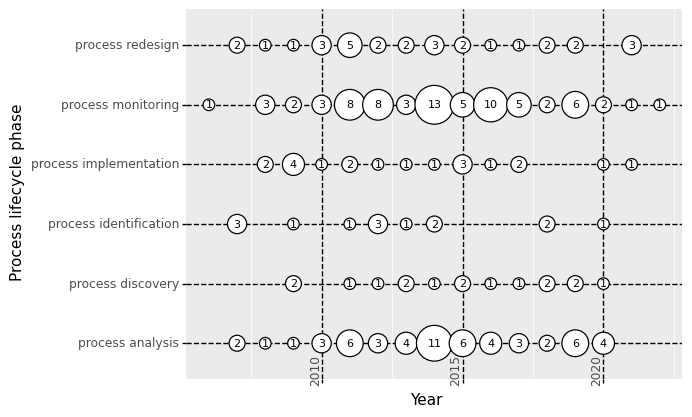

In [29]:
incl_list= list(dict_plc_translation.keys()-{'undetermined'})
datadash.create_bubble_multivalued_single("Process lifecycle phase", 'year', incl_list)

#### RQ3.2.What are the challenges taken off in the field?
The rationale behind this question is to identify which of the challenges in the area have been face up to.

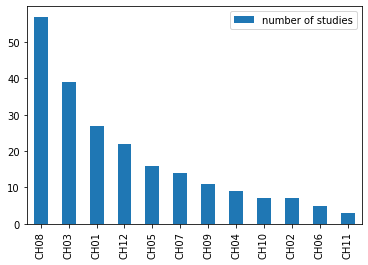

challenge
integrated platforms for BPM & CEP               57
automatic event-based monitoring of processes    39
event models for BPM                             27
from event streams to process models and back    22
choreographies&inter-process correlation         16
                                                 ..
patterns and models for communication             9
optimisation opportunities                        7
compliance& audit& privacy& security              7
abstraction levels                                5
event data quality                                3
Name: number of studies, Length: 12, dtype: int64


In [30]:
dict_translation={'event models for BPM':'CH01',\
                      'compliance& audit& privacy& security': 'CH02',\
                      'automatic event-based monitoring of processes' : 'CH03',\
                      'patterns and models for communication':'CH04',\
                      'choreographies&inter-process correlation':'CH05',\
                      'abstraction levels':'CH06',\
                      'context in events and processes':'CH07',\
                      'integrated platforms for BPM & CEP':'CH08',\
                      '(highly) distributed processes & the role of events':'CH09',\
                      'optimisation opportunities':'CH10',\
                      'event data quality':'CH11',\
                      'from event streams to process models and back':'CH12',\
                      'other':'CH13',\
                      'undetermined':'undetermined'
                      }   
datadash.create_bar_count_multivalued_column("challenge", translation=dict_translation)

challenge_count_df= datadash.get_data.count_multivalued_column("challenge")
print(challenge_count_df)

Study per challenge

In [31]:
 test_utils.show_dict_from_multivalued_column(datadash, "challenge")

patterns and models for communication --> [150, 166, 2105, 2131, 2709, 2964, 296369, 507986, 2644180]
optimisation opportunities --> [110, 128, 189, 3071, 14777, 237068, 3343996]
integrated platforms for BPM & CEP --> [6, 18, 100, 107, 109, 112, 124, 1901, 1913, 1918, 1926, 1936, 1969, 2001, 2007, 2009, 2017, 2023, 2040, 2052, 2053, 2094, 2106, 2127, 2131, 2195, 2227, 2265, 2276, 2277, 2344, 2557, 2566, 2569, 2605, 2673, 2765, 2816, 2849, 2904, 2921, 2932, 13649, 13682, 13717, 14145, 14356, 14777, 237136, 265471, 296464, 507542, 507613, 1932566, 1932748, 2117201, 2644405]
from event streams to process models and back --> [97, 139, 1971, 1978, 1992, 2003, 2051, 2053, 2054, 2105, 2106, 2720, 2721, 2849, 2907, 13621, 14098, 14777, 296444, 2614833, 2614909, 3247016]
event models for BPM --> [10, 107, 118, 166, 205, 245, 1906, 1992, 2019, 2021, 2094, 2105, 2106, 2108, 2130, 2252, 2392, 2565, 2673, 2811, 14098, 14777, 265374, 374576, 471320, 1932839, 2353249]
event data quality --> [2694, 29

Relationship between challenges and process lifecycles

In [32]:
datadash.create_tree_map_from_multivalued_columns("Process lifecycle phase", 'challenge',\
                                                        translations=[None, dict_translation] )
